# Predicting Employee Productivity Using Tree Models

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1522199670076-2852f80289c3?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80" width="800" height="100">
  <br>
  Source: <a href="https://unsplash.com/">Unsplash</a>
</p>


In this project, we will be acquainting ourselves with the remarkable dataset, "Productivity Prediction of Garment Employees," which offers valuable insights into the garment industry's productivity performance. This dataset is a valuable resource, sourced from the prestigious [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees), renowned for its high-quality datasets. Below is a description of the dataset, according to its official summary:

> "*The garment industry is one of the key examples of the industrial globalization of the modern era.
It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.*"

<p style="text-align:center;">
  <img src="https://s3.amazonaws.com/dq-content/755/garment-factory-unsplash.jpg" width="800" height="100">
  <br>
  Source: <a href="https://www.dataquest.io/">DataQuest</a>
</p>

What makes this dataset particularly fascinating is its versatility, as it can be utilized with both regression and classification algorithms, as stated in the official summary's final sentence:

> "*This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.*"

While this dataset's versatility allows us to analyze it using a variety of different methods and techniques, in this project, we will be concentrating on utilizing a classification tree. By focusing on this method, we aim to gain valuable insights into the productivity performance of garment employees and improve our understanding of the garment industry's manufacturing processes.

## Import Libraries and Load Data

To get started, we will import the necessary libraries and load the "Productivity Prediction of Garment Employees" dataset into a DataFrame, enabling us to manipulate and analyze the data effectively.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('garments_worker_productivity.csv')

# View result
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

As with any other dataset, determining what each column is telling us is a fundamental part of the exploration. The following is the dataset's official column information:

- `date`: date in MM-DD-YYYY
- `quarter`: a portion of the month — month was divided into four quarters
- `department`: associated department with the instance
- `day`: day of the week
- `team`: associated team number with the instance
- `targeted_productivity`: targeted productivity set by the authority for each team for each day
- `smv`: standard minute value — the allocated time for a task
- `wip`: work in progress — includes the number of unfinished items for products
- `over_time`: represents the amount of overtime by each team in minutes
- `incentive`: represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action
- `idle_time`: the duration of time when the production was interrupted due to several reasons
- `idle_men`: the number of workers who were idle due to production interruption
- `no_of_style_change`: number of changes in the style of a particular product
- `no_of_workers`: number of workers on each team
- `actual_productivity`: the actual % of productivity that was delivered by the workers — it ranges from 0 to 1.

To gain a better understanding of the dataset, we will conduct an Exploratory Data Analysis (EDA). Before making any changes, it's crucial to comprehend the dataset's structure, general characteristics, and what it tells us.

To begin, let's obtain the shape of the dataset, where the first value represents the number of observations, and the second value represents the number of columns.

In [3]:
df.shape

(1197, 15)

Next, we will take a closer look at the columns by examining their non-null observation counts and respective data types (dtypes). It's important to keep in mind that in pandas, an "object" dtype indicates that the column's observations are treated as strings or text.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The output of `df.info()` provides useful information about the dataset, such as the number of entries (in this case, 1197), the total number of columns (15), and the name, count, and data type of each column. It shows that there are 4 columns with an object data type, indicating that the observations of these columns are treated as strings/text. Additionally, it shows that the `wip` column has missing values, as indicated by the difference in the number of non-null counts across columns. This information is crucial to understanding the structure and characteristics of the dataset.

Let's gather some general statistics on the numerical columns. It's important to keep in mind that std refers to Standard Deviation, while the percentiles represent the range in which a certain percentage of the data falls. The minimum and maximum values of each column are also displayed, which can be helpful in identifying any outliers present in the dataset.

In [10]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


From the summary statistics table, we can observe the following:

- `team`: The average team number is 6.4, with a minimum of 1 and a maximum of 12.
- `targeted_productivity`: The mean targeted productivity is 0.73, with a minimum of 0.07 and a maximum of 0.8.
- `smv`: The average standard minute value is 15.06, with a minimum of 2.9 and a maximum of 54.56.
- `wip`: The average work in progress is 1190.47, with a minimum of 7 and a maximum of 23122.
- `over_time`: The average overtime is 4567.46, with a minimum of 0 and a maximum of 25920.
- `incentive`: The average incentive is 38.21, with a minimum of 0 and a maximum of 3600.
- `idle_time`: The average idle time is 0.73, with a minimum of 0 and a maximum of 300.
- `idle_men`: The average number of idle men is 0.37, with a minimum of 0 and a maximum of 45.
- `no_of_style_change`: The average number of style changes is 0.15, with a minimum of 0 and a maximum of 2.
- `no_of_workers`: The average number of workers is 34.61, with a minimum of 2 and a maximum of 89.
- `actual_productivity`: The average actual productivity is 0.74, with a minimum of 0.23 and a maximum of 1.12.

By examining the table, we can discover several interesting facts about the dataset. For example:

- There are missing values in the `wip` column, as the count for that column is only 691 instead of 1197.
- There are several columns with a maximum value that is much higher than the 75th percentile, indicating the presence of outliers in the dataset.
- The range of values for each column varies widely, indicating the need for scaling or normalization as we plan to use these features to build our model.

We see that the targeted productivity has a relatively small range, suggesting that there may be strict targets for productivity that the factory is trying to meet. The average overtime is quite high, which may indicate that the factory is having trouble meeting its production targets within regular working hours. The number of workers ranges from 2 to 89, suggesting that there may be some variability in the workforce size depending on production needs.

The statistics related to idle time and idle men are particularly interesting, as they suggest that there may be some issues with productivity in the factory. The fact that the average idle time is relatively low, but there is still a maximum of 300 minutes of idle time, suggests that there may be some production stoppages or other issues that are causing lost time. Similarly, the fact that there is a maximum of 45 idle men suggests that there may be some inefficiencies in the workforce or production process.

Overall, the summary statistics give us a high-level view of the data and can be used to identify potential areas for improvement or further investigation.

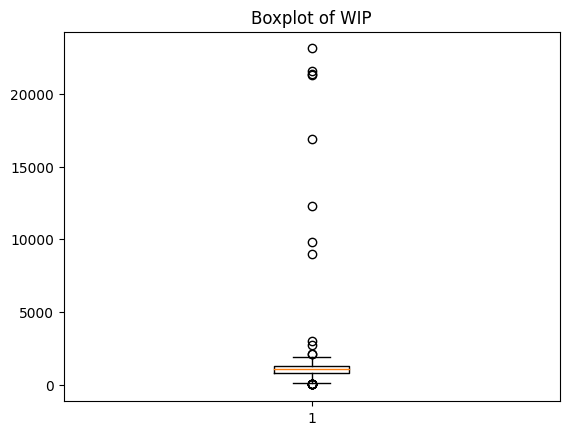

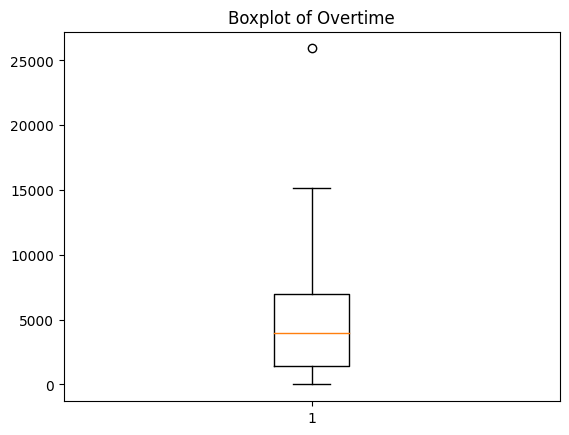

In [8]:
# Create a boxplot for wip
plt.boxplot(df['wip'].dropna())
plt.title("Boxplot of WIP")
plt.show()

# Create a boxplot for over_time
plt.boxplot(df['over_time'])
plt.title("Boxplot of Overtime")
plt.show()

[<matplotlib.lines.Line2D object at 0x00000043E5B96B30>, <matplotlib.lines.Line2D object at 0x00000043E5B96E00>]


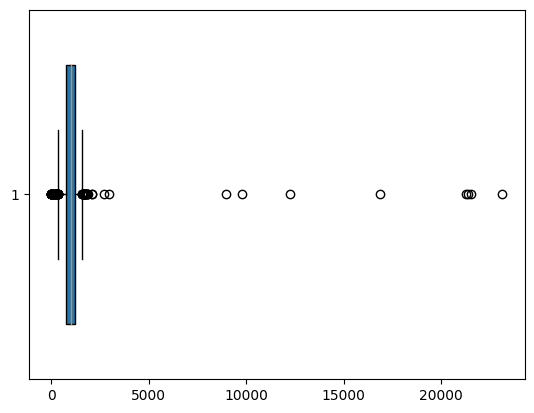

In [7]:
wip_box = plt.boxplot(df['wip'].dropna(), vert=False, widths=0.7, patch_artist=True, whis=[5,95])
print(wip_box['whiskers'])
